<img src="./logo_UNSAM.jpg" align="right" width="150" />

#### Análisis y Procesamiento de Señales

# Tarea semanal Nº2
#### Guadalupe Cura

#### INTRODUCCIÓN
        La Transformada Discreta de Fourier (DFT) es una herramienta fundamental para el análisis de señales discretas, ya que permite representar una secuencia de tiempo discreto en el dominio de la frecuencia. Se define formalmente como:

$$
X[k] = \sum_{n=0}^{N-1} x[n] e^{-j2\pi kn/N}, \quad k=0,1,\dots,N-1
$$

    donde 𝑘 es el índice de frecuencia que puede transformarse a frecuencia física mediante $ 𝑓-{𝑘}=(𝑘/𝑁)*𝑓𝑠 $ , siendo 𝑓𝑠 la frecuencia de muestreo. De esta manera, el eje de frecuencias se interpreta en el rango de 0 a 𝑓𝑠 Hz, o de 0 a 2𝜋 radianes por muestra, y en señales reales suele graficarse solo la mitad positiva debido a la simetría conjugada de la DFT. La DFT puede interpretarse como un muestreo de la Transformada de Fourier de Tiempo Discreto (DTFT) en 𝑁 frecuencias uniformemente espaciadas, y su implementación práctica más conocida es la Transformada Rápida de Fourier (FFT), que reduce el costo computacional.
        Cuando se analizan señales de duración finita, se está multiplicando implícitamente la señal infinita por una ventana rectangular de longitud 𝑁, finita, definida como
$$
w[n] =
\begin{cases}
1, & 0 \leq n \leq N-1 \\
0, & \text{caso contrario}
\end{cases}
$$

         Esto equivale a multiplicar la señal infinita por una ventana rectangular en el tiempo, lo que en el dominio de la frecuencia se convierte en una convolución del espectro de la señal con la Transformada de Fourier de la ventana. La transformada de la ventana rectangular tiene la forma de una sinc.

$$
W(\Omega) = \frac{\sin(\Omega N/2)}{\sin(\Omega/2)}
$$

        Lo que produce que los picos espectrales no sean infinitamente delgados sino que tengan adopten la forma de la sinc, con lóbulos principales y secundarios que se extienden a lo largo de todo el espectro.  

        Para mejorar la visualización de las componentes espectrales, se emplea el zero-padding, que consiste en añadir ceros al final de la secuencia \(x[n]\) aumentando \(N\), lo que genera un muestreo más denso del espectro y una representación más detallada de las sinc resultantes. Es importante destacar que esta técnica no añade nueva información espectral ni reduce el leakage, sino que mejora la resolución en frecuencia gracias a la reducción de \(\Delta f\).  

    Por último, el Teorema de Parseval establece que la energía total de la señal es la misma en el dominio temporal y en el de la frecuencia:

$$
\sum_{n=0}^{N-1} |x[n]|^2 = \frac{1}{N} \sum_{k=0}^{N-1} |X[k]|^2
$$

    lo que justifica el uso del análisis espectral no solo para estudiar la distribución de energía en distintas componentes de frecuencia, sino también para cuantificarla de forma exacta.


#### ANÁLISIS Y DESARROLLO
        Para comenzar con la tarea semanal, se definieron una serie de funciones senoidales, cada una con una frecuencia diferente pero con la misma amplitud, definida en raiz de dos para normalizar la potencia.
        La primera senoidal está definida con frecuencia= $N/4$, la segunda con frecuencia= $(N/4)+0,25$ y la tercera con frecuencia=$(N/4)+0,5$. 

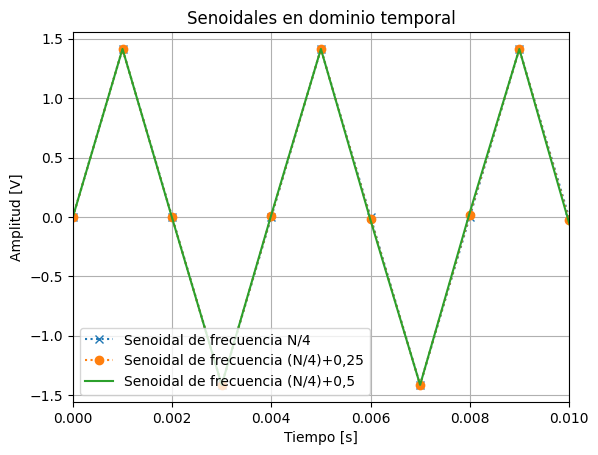

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft

N=1000
fs=1000
df=fs/N #espaciamiento de frecuencia en la DFT
ts=1/fs
  
    
def sen(ff,nn,amp=np.sqrt(2), dc=0, ph=0, fs=1000):
    n=np.arange(nn)
    t=n/fs
    x=dc+amp*np.sin(2*np.pi*ff*t+ph)
    return t,x

t1,x1= sen(ff=(N/4)*df, nn=N,amp=np.sqrt(2), fs=fs)

t2,x2= sen(ff=((N/4)+0.25)*df, amp=np.sqrt(2), nn=N, fs=fs)   
t3,x3= sen(ff=((N/4)+0.5)*df, nn=N, amp=np.sqrt(2), fs=fs)   

plt.figure(1)
plt.plot(t1, x1,':x',label="Senoidal de frecuencia N/4")
plt.plot(t2,x2,':o',label="Senoidal de frecuencia (N/4)+0,25")
plt.plot(t3,x3,label="Senoidal de frecuencia (N/4)+0,5")
plt.xlim(0,0.01)
plt.title("Senoidales en dominio temporal")
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.legend()
plt.grid(True)
plt.show()


        Como se puede observar, las frecuencias por más de no ser iguales son muy cercanas por lo que su representación en el dominio temporal, mantiene una similitud. 
        Para pasar al dominio de las frecuencias, se calcula la DFT, más precisamente la FFT, que es la transformada rápida de Fourier.

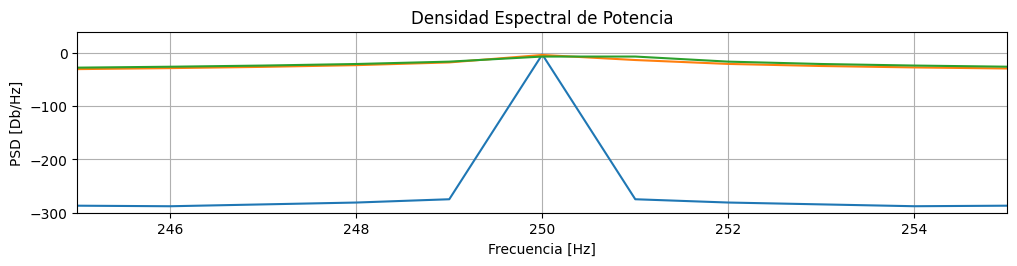

In [30]:
#-------------------------------------------------
#Calculo de la DFT -> FFT
X1=(fft(x1))
X2=(fft(x2))
X3=(fft(x3))

#calculo valor abs
X1abs=np.abs(X1)
X2abs=np.abs(X2)
X3abs=np.abs(X3)

#defino eje de frecuencias
ff= np.arange(N)*df

# Cálculo de la densidad espectral de potencia (PSD)
# La PSD se calcula como el cuadrado de la magnitud de la FFT
PSD1 = np.abs(X1)**2 / (N **2)  # Normalizado por N y fs
PSD2 = np.abs(X2)**2 / (N **2)
PSD3 = np.abs(X3)**2 / (N **2)

# Gráfico de la densidad espectral de potencia
plt.figure(figsize=(12, 8))

# Señal 1
plt.subplot(3, 1, 1)
plt.plot(ff, 10*np.log10(PSD1),label="PDS para f=N/4")  # Mostramos solo la mitad positiva del espectro
plt.plot(ff,10*np.log10(PSD2),label="PDS para f=N/4+0,25")
plt.plot(ff, 10*np.log10(PSD3),label="PDS para f=N/4+0,5")
plt.title('Densidad Espectral de Potencia')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [Db/Hz]')
plt.grid(True)
plt.xlim(245, 255)
plt.ylim(-300, 40)
plt.show()


        La densidad espectral de potencia obtenida muestra que, cuando la frecuencia de la señal coincide exactamente con un múltiplo de la resolución espectral de la DFT (caso f=N/4), la energía queda concentrada principalmente en un solo bin. El espectro resultante tiene una forma muy localizada, similar a un triángulo o un pico muy angosto en el dominio de la frecuencia.
        En cambio, a medida que la frecuencia de la señal se desintoniza respecto de los bins de la DFT (f=N/4+0,25 y f=N/4+0,5) la energía ya no puede concentrarse en un único bin, sino que se reparte entre varios. Esto produce un ensanchamiento del lóbulo principal y la aparición de lóbulos secundarios, que hacen que la densidad espectral se vea más dispersa o menos concentrada.
        Este efecto se debe a que la DFT asume periodicidad en el intervalo analizado entonces si la señal completa un número entero de ciclos en la ventana de observación, el espectro discreto coincide exactamente con los bins de la DFT y la energía se representa sin distorsión. En cambio, cuando esto no ocurre y la señal no es periódica dentro de la ventana, la multiplicación por la ventana rectangular de sampleo genera un efecto de convolución en frecuencia que te da una función tipo sinc generando un desparramo de la energía en torno a la frecuencia central. 
        Sin embargo, este efecto de la función tipo sinc con picos y lóbulos secundarios no se puede observar con claridad en el gráfico anterior, es por eso que se utiliza un procedimiento llamado zero-padding que nos permite tener una mejor resolución de lo que sucede al agregar muestras. 

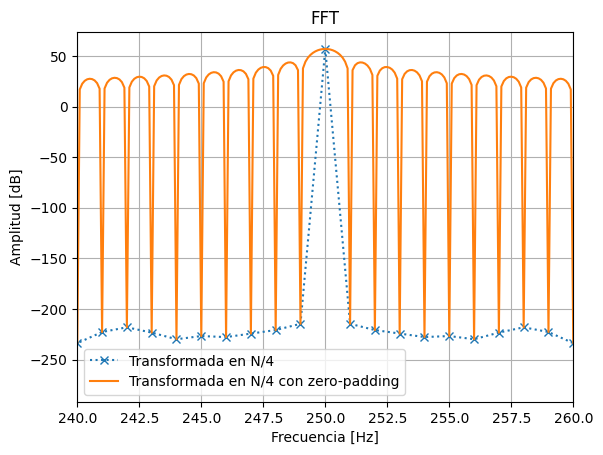

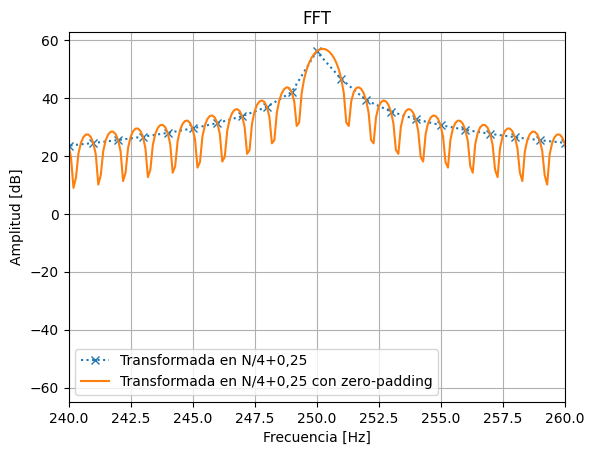

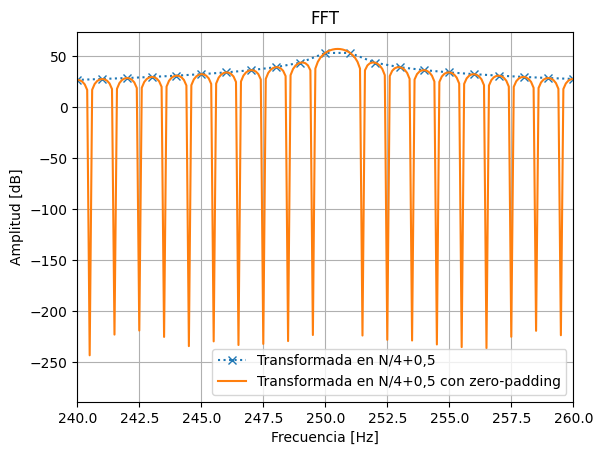

In [21]:
#------------------------------------------------------
#zero padding

#1)
Npad = 10 * N
xz1 = np.zeros(Npad)
xz1[:N] = x1
Xz1 = fft(xz1)
Xz1abs = np.abs(Xz1)
frec2 = np.arange(Npad) * fs /Npad

plt.figure(4)
plt.plot(ff,np.log10(X1abs)*20,':x',label="Transformada en N/4")
plt.plot(frec2,np.log10(Xz1abs)*20,label="Transformada en N/4 con zero-padding")
plt.xlim(240,260)
plt.title("FFT")
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud [dB]')
plt.legend()
plt.grid(True)
plt.show()

#2)
xz2 = np.zeros(Npad)
xz2[:N] = x2
Xz2 = fft(xz2)
Xz2abs = np.abs(Xz2)
frec2 = np.arange(Npad) * fs /Npad

plt.figure(5)
plt.plot(ff,np.log10(X2abs)*20,':x',label="Transformada en N/4+0,25")
plt.plot(frec2,np.log10(Xz2abs)*20,label="Transformada en N/4+0,25 con zero-padding")
plt.xlim(240,260)
plt.title("FFT")
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud [dB]')
plt.legend()
plt.grid(True)
plt.show()

#3)
xz3 = np.zeros(Npad)
xz3[:N] = x3
Xz3 = fft(xz3)
Xz3abs = np.abs(Xz3)
frec2 = np.arange(Npad) * fs /Npad

plt.figure(6)
plt.plot(ff,np.log10(X3abs)*20,':x',label="Transformada en N/4+0,5")
plt.plot(frec2,np.log10(Xz3abs)*20,label="Transformada en N/4+0,5 con zero-padding")
plt.xlim(240,260)
plt.title("FFT")
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud [dB]')
plt.legend()
plt.grid(True)
plt.show()

        Como se puede ver en los gráficos, gracias a la técnica del zero padding, al aumentar la cantidad de muestras, no solo aumenta la cantidad de valores de los cuales se calcula la fft, sino que la frecuencia de muestreo es menor haciendo que aumente el sampleo, lo que evidencia la existencia de las sinc. 
    En el primer caso (N/4), como ya fue explicado, la señal es periódica dentro de la ventana de análisis, por lo que toda la energía queda concentrada en un único bin de la FFT. Como consecuencia, los demás coeficientes toman valor nulo, lo que se observa en el gráfico como los puntos azules cayendo muy por debajo de la curva continua. Al aplicar zero padding, lo que se obtiene es una interpolación del espectro continuo (la función sinc), por lo que la curva naranja rellena suavemente entre los puntos de la FFT y siempre se mantiene por encima en las frecuencias donde la sinc no se anula.
    En el segundo caso (N/4 + 0,25), la frecuencia de la señal ya no coincide con un bin exacto, lo que provoca fuga espectral: la energía no se concentra en un único coeficiente, sino que se reparte entre varios. La FFT sin zero padding muestrea pocos puntos de la envolvente sinc, lo que hace que el espectro azul aparente un “piso” más elevado y menos definido. Con el zero padding, en cambio, se obtiene una mayor resolución en frecuencia que permite apreciar la envolvente triangular de la sinc y sus lóbulos laterales, mostrando la verdadera distribución de la energía.
    En el tercer caso (N/4 + 0,5), la desintonía es mayor, por lo que la energía se reparte aún más entre los distintos bins. Esto produce que el espectro discreto (azul) se vea prácticamente plano y con un piso elevado, mientras que el espectro interpolado mediante zero padding (naranja) revela nuevamente la forma sinc característica con un máximo central y lóbulos laterales.
    En resumen, el zero padding no modifica la potencia de la señal ni la distribución espectral, sino que actúa como un método de interpolación que permite visualizar de manera continua la envolvente sinc subyacente. Las diferencias en los pisos de los gráficos no corresponden a ruido real, sino al efecto de la fuga espectral: cuando la frecuencia coincide con un bin exacto, los coeficientes fuera del pico son nulos, mientras que al existir desintonía, la energía se reparte y eleva el nivel de los demás coeficientes.

In [5]:
#--------------------------------------------------
#Parseval
#1)

xp1 = x1 /np.sqrt(np.var(x1))
print("Varianza:",np.var(xp1))

Xf = np.fft.fft(xp1)
Xmod = np.abs(Xf)**2


Et = np.sum(np.abs(xp1)**2)
Efrec = (1/N)*np.sum(Xmod)
if Et == Efrec:
    print("Para el primero: \nSe cumple la identidad de Parseval")
else:
    print("Para el primero: \nDiferencia de la identidad de Parseval:",Et-Efrec)
    
    
#2) 
xp2 = x2 /np.sqrt(np.var(x2))
print("Varianza:",np.var(xp2))

Xf = np.fft.fft(xp2)
Xmod = np.abs(Xf)**2


Et = np.sum(np.abs(xp2)**2)
Efrec = (1/N)*np.sum(Xmod)
if Et == Efrec:
    print("Para el segundo: \nSe cumple la identidad de Parseval")
else:
    print("Para el segundo: \nDiferencia de la identidad de Parseval:",Et-Efrec)
 
    
#3)
xp3 = x3 /np.sqrt(np.var(x3))
print("Varianza:",np.var(xp3))

Xf = np.fft.fft(xp3)
Xmod = np.abs(Xf)**2


Et = np.sum(np.abs(xp3)**2)
Efrec = (1/N)*np.sum(Xmod)
if Et == Efrec:
    print("Para el tercero: \nSe cumple la identidad de Parseval")
else:
    print("Para el tercero: \nDiferencia de la identidad de Parseval:",Et-Efrec)

#------------------------------------------------------

Varianza: 1.0
Para el primero: 
Diferencia de la identidad de Parseval: 1.1368683772161603e-13
Varianza: 1.0
Para el segundo: 
Se cumple la identidad de Parseval
Varianza: 1.0
Para el tercero: 
Diferencia de la identidad de Parseval: 1.1368683772161603e-13


        Para el ejercicio bonus, se pidió calcular la salida de los sistemas de la TS2 pero en frecuencia. Para esto se utilizó la función freqz de la librería de signal que lo que hace es...

C:\Users\USUARIO\Documents\Entornos\aps\Lib\site-packages\scipy\signal\_filter_design.py:564: RuntimeWarning: divide by zero encountered in divide
  h = (_pu.npp_polyval(zm1, b, tensor=False, xp=xp) /
C:\Users\USUARIO\Documents\Entornos\aps\Lib\site-packages\scipy\signal\_filter_design.py:564: RuntimeWarning: invalid value encountered in divide
  h = (_pu.npp_polyval(zm1, b, tensor=False, xp=xp) /


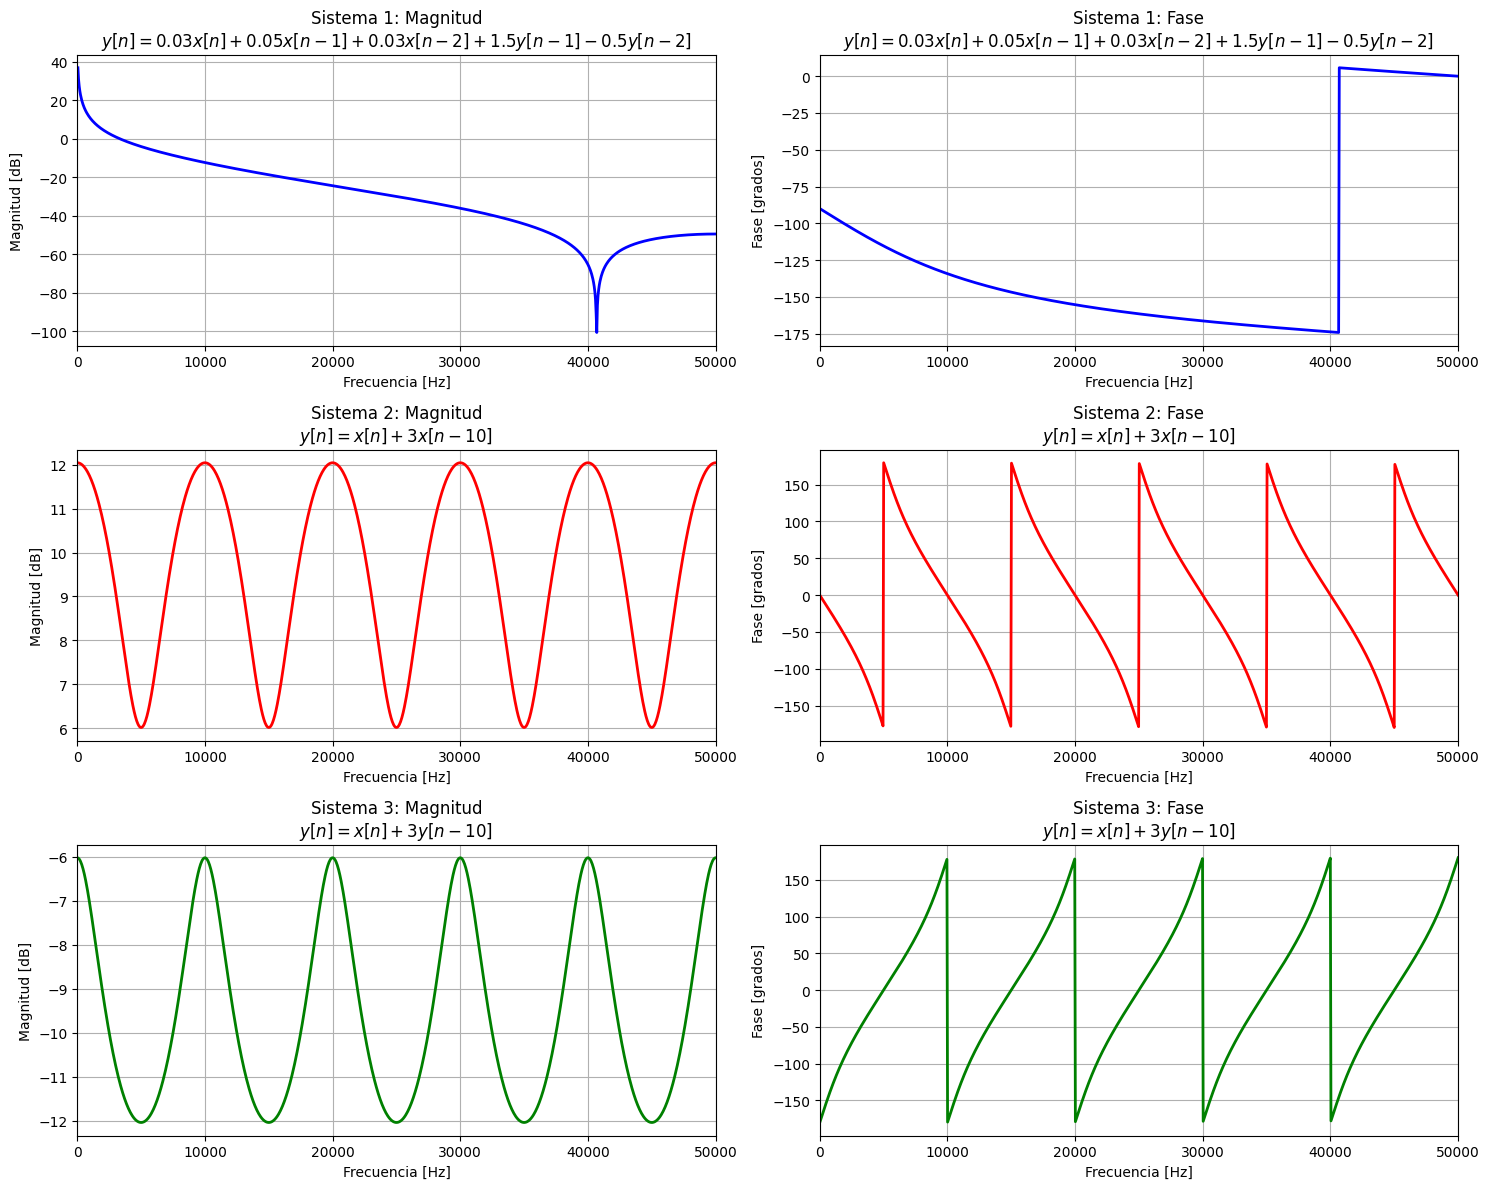

In [31]:
from scipy import signal

# Coeficientes de tus sistemas LTI
# Sistema 1: y[n] = 0.03*x[n] + 0.05*x[n-1] + 0.03*x[n-2] + 1.5*y[n-1] - 0.5*y[n-2]
b1 = [0.03, 0.05, 0.03]  # Coeficientes de x
a1 = [1, -1.5, 0.5]      # Coeficientes de y

# Sistema 2: y[n] = x[n] + 3*x[n-10]
b2 = [1] + [0]*9 + [3]   # [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3]
a2 = [1]                 # Solo componente actual

# Sistema 3: y[n] = x[n] + 3*y[n-10]
b3 = [1]                 # Solo componente actual de x
a3 = [1] + [0]*9 + [-3]  # [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3]

# Calculamos la respuesta en frecuencia
fm = 100000  # Frecuencia de muestreo
frecuencias = np.linspace(0, fm/2, 1000)  # De 0 a fm/2 (Nyquist)

# Usamos freqz para calcular la respuesta
w1, h1 = signal.freqz(b1, a1, worN=frecuencias, fs=fm)
w2, h2 = signal.freqz(b2, a2, worN=frecuencias, fs=fm)
w3, h3 = signal.freqz(b3, a3, worN=frecuencias, fs=fm)

# Crear figura con 6 subplots (3 filas, 2 columnas)
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# ===== SISTEMA 1 =====
# Magnitud del Sistema 1
axes[0, 0].plot(w1, 20 * np.log10(np.abs(h1)), 'b-', linewidth=2)
axes[0, 0].set_title('Sistema 1: Magnitud\n$y[n] = 0.03x[n] + 0.05x[n-1] + 0.03x[n-2] + 1.5y[n-1] - 0.5y[n-2]$')
axes[0, 0].set_xlabel('Frecuencia [Hz]')
axes[0, 0].set_ylabel('Magnitud [dB]')
axes[0, 0].grid(True)
axes[0, 0].set_xlim(0, fm/2)

# Fase del Sistema 1
axes[0, 1].plot(w1, np.angle(h1, deg=True), 'b-', linewidth=2)
axes[0, 1].set_title('Sistema 1: Fase\n$y[n] = 0.03x[n] + 0.05x[n-1] + 0.03x[n-2] + 1.5y[n-1] - 0.5y[n-2]$')
axes[0, 1].set_xlabel('Frecuencia [Hz]')
axes[0, 1].set_ylabel('Fase [grados]')
axes[0, 1].grid(True)
axes[0, 1].set_xlim(0, fm/2)

# ===== SISTEMA 2 =====
# Magnitud del Sistema 2
axes[1, 0].plot(w2, 20 * np.log10(np.abs(h2)), 'r-', linewidth=2)
axes[1, 0].set_title('Sistema 2: Magnitud\n$y[n] = x[n] + 3x[n-10]$')
axes[1, 0].set_xlabel('Frecuencia [Hz]')
axes[1, 0].set_ylabel('Magnitud [dB]')
axes[1, 0].grid(True)
axes[1, 0].set_xlim(0, fm/2)

# Fase del Sistema 2
axes[1, 1].plot(w2, np.angle(h2, deg=True), 'r-', linewidth=2)
axes[1, 1].set_title('Sistema 2: Fase\n$y[n] = x[n] + 3x[n-10]$')
axes[1, 1].set_xlabel('Frecuencia [Hz]')
axes[1, 1].set_ylabel('Fase [grados]')
axes[1, 1].grid(True)
axes[1, 1].set_xlim(0, fm/2)

# ===== SISTEMA 3 =====
# Magnitud del Sistema 3
axes[2, 0].plot(w3, 20 * np.log10(np.abs(h3)), 'g-', linewidth=2)
axes[2, 0].set_title('Sistema 3: Magnitud\n$y[n] = x[n] + 3y[n-10]$')
axes[2, 0].set_xlabel('Frecuencia [Hz]')
axes[2, 0].set_ylabel('Magnitud [dB]')
axes[2, 0].grid(True)
axes[2, 0].set_xlim(0, fm/2)

# Fase del Sistema 3
axes[2, 1].plot(w3, np.angle(h3, deg=True), 'g-', linewidth=2)
axes[2, 1].set_title('Sistema 3: Fase\n$y[n] = x[n] + 3y[n-10]$')
axes[2, 1].set_xlabel('Frecuencia [Hz]')
axes[2, 1].set_ylabel('Fase [grados]')
axes[2, 1].grid(True)
axes[2, 1].set_xlim(0, fm/2)

# Ajustar espaciado y mostrar
plt.tight_layout()
plt.show()


        Como se puede ver, para graficoarlo se hizo en función  a la fase y a la magnitud, es decir módulo, ya que HAY ALGO EN COMPLEJOS???

#### CONCLUSION
        Para concluir, en esta tarea se puede ver una especie de introducción a los temas que vimos en clase, como el piso de ruido y el desparramo espectral, así como también los diferentes espectros del ventaneo y las consecuencias de las frecuencias incompletas en las mismas que general leakage. 
        La comprobación de la teoría de Párseval nos permitió verificar QUE 
        Por otro lado también fue útil para poder interpretar los gráficos del desparramo espectral de potencias y ver los impactos en la definición cuando se utiliza en zero padding. 
        Por último, se pudo representar respuestas a sistemas LTI en frecuencia a su vez que graficarlas.
        

#### AUTOEVALUACIÓN DE CONOCIMIENTOS
        Utilicé inteligencia artificial para poder utilizar funciones como la última para pasar el sistema LTI al dominio de las frecuencias, a su vez que su ayuda para la interpretación de algunos detalles de los gráficos. 
        